<a href="https://colab.research.google.com/github/vladlesnyh/optimization/blob/main/%D0%9B%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
!pip install ortools
from ortools.sat.python import cp_model # CP-SAT solver

import numpy as np
from random import randint
from math import ceil
import matplotlib.pyplot as plt # Data visualization
plt.rcParams["figure.figsize"] = (15,10)

# Исходные данные

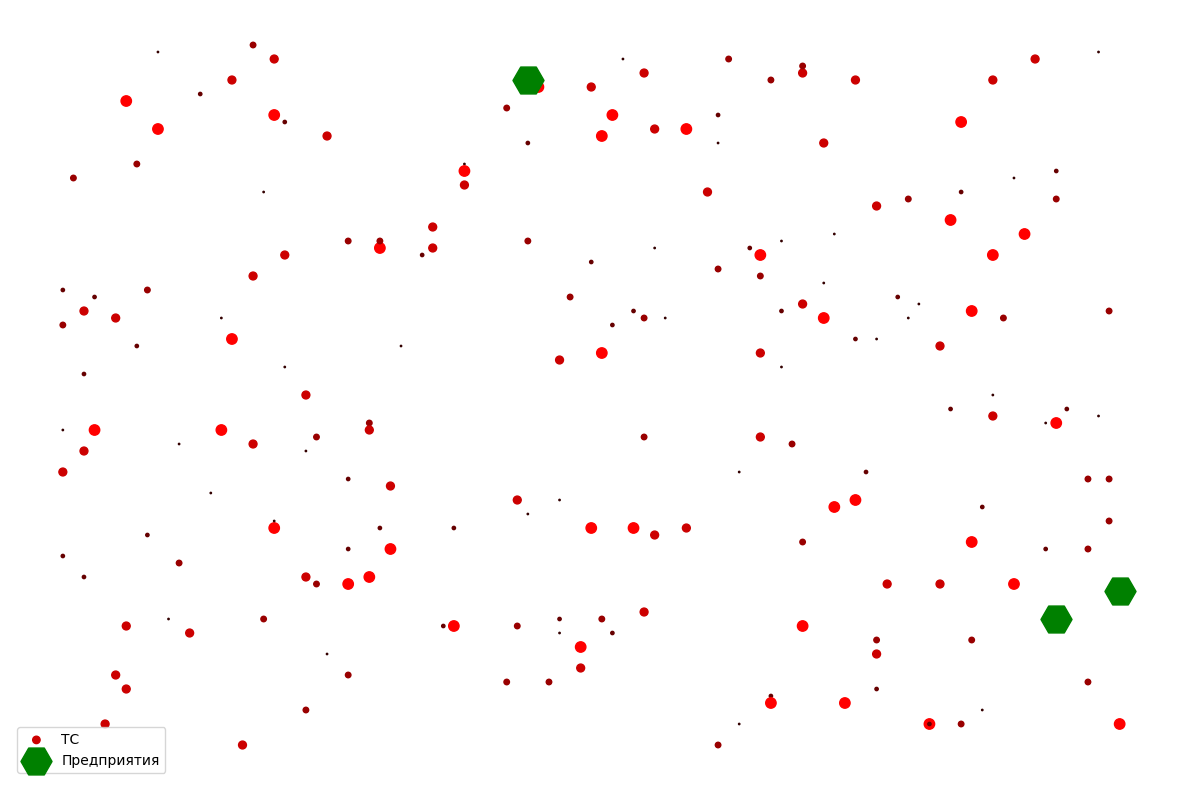

In [52]:
# Число предприятий
n_predpriatia = 3
# Число ТС, которые могут отвезти товар
n_ts = 200
# Число точек, привязанных к каждому предприятию
n_tochek_in_predpriatia = [30,40,15]
# Полное число точек
n_tochek_total = sum(n_tochek_in_predpriatia)
# Местоположение ТС -- random integer tuple (x,y)
ts_loc = [(randint(0, 100), randint(0, 100)) for _ in range(n_ts)]
# Местоположение предприятий -- random integer tuple (x,y)
predpriatya_loc = [(randint(0, 100), randint(0, 100)) for _ in range(n_predpriatia)]
# Необходимость обеспечения точек -- 1 = к -> 5 = чем больше, тем быстрее необходимо подвести товар
tochki_necessity = [randint(1, 5) for _ in range(n_ts)]

# Визуализация
shade_necessity = [int(sev*255/5) for sev in tochki_necessity]
color_necessity = ["#%02x0000" % (sev) for sev in shade_necessity]
size_necessity = [k**2.5 for k in tochki_necessity]
plt.scatter(*zip(*ts_loc), s=size_necessity, c=color_necessity, label="ТС")
plt.scatter(*zip(*predpriatya_loc), s=500, c="g", marker="H", label="Предприятия")
plt.legend()
plt.axis('off')
plt.show()

# Создание данных в модели



In [53]:
model = cp_model.CpModel()
x = {}
for i in range(n_predpriatia):
  for j in range(n_tochek_in_predpriatia[i]):
    for k in range(n_ts):
      x[(i,j,k)] = model.NewBoolVar("x(%d,%d,%d)" % (i,j,k))

# Ограничения


In [54]:
# Каждая точка обслуживается одним ТС
for i in range(n_predpriatia):
  for j in range(n_tochek_in_predpriatia[i]):
    model.Add(sum(x[(i,j,k)] for k in range(n_ts)) <= 1)


# Каждое ТС обслуживает одну точку
for k in range(n_ts):
  inner_sum = []
  for i in range(n_predpriatia):
    inner_sum.append(sum(x[(i,j,k)] for j in range(n_tochek_in_predpriatia[i])))
  model.Add(sum(inner_sum) <= 1)

In [55]:
# Расчет расстояния
idist = lambda xy1, xy2: int(((xy1[0]-xy2[0])**2 + (xy1[1]-xy2[1])**2)**0.5)

# Штрафные коэффициенты
gain_max_ts = 140
gain_necessity = int(140/5)
gain_distance = -1

# Максимизация
soft_csts = []
for i in range(n_predpriatia):
  for j in range(n_tochek_in_predpriatia[i]):
    for k in range(n_ts):
      factor = \
        gain_max_ts \
        + gain_distance * idist(predpriatya_loc[i], ts_loc[k]) \
        + gain_necessity * tochki_necessity[k]
      soft_csts.append(factor * x[(i,j,k)])

model.Maximize(sum(soft_csts))

# Решение модели

In [56]:
solver = cp_model.CpSolver()
solver.parameters.max_time_in_seconds = 60.0
status = solver.Solve(model)

# Вывод результатов

In [57]:
plot_lines = [[] for _ in range(n_predpriatia)]
for i in range(n_predpriatia):
  print("Предприятие ", i)
  for j in range(n_tochek_in_predpriatia[i]):
    for k in range(n_ts):
      if solver.Value(x[(i,j,k)]) == 1:
        print("\tТС ", k, "на точке ", j)
        line_abs = [ predpriatya_loc[i][0], ts_loc[k][0] ]
        line_ord = [ predpriatya_loc[i][1], ts_loc[k][1] ]
        plot_lines[i].append([line_abs, line_ord])
print()
print("Время расчета: %f s" % solver.WallTime())

Предприятие  0
	ТС  41 на точке  0
	ТС  124 на точке  1
	ТС  127 на точке  2
	ТС  137 на точке  3
	ТС  142 на точке  4
	ТС  159 на точке  5
	ТС  172 на точке  6
	ТС  46 на точке  7
	ТС  84 на точке  8
	ТС  187 на точке  9
	ТС  152 на точке  10
	ТС  61 на точке  11
	ТС  5 на точке  12
	ТС  191 на точке  13
	ТС  195 на точке  14
	ТС  98 на точке  15
	ТС  39 на точке  16
	ТС  177 на точке  17
	ТС  43 на точке  18
	ТС  123 на точке  19
	ТС  36 на точке  20
	ТС  120 на точке  21
	ТС  122 на точке  22
	ТС  64 на точке  23
	ТС  86 на точке  24
	ТС  110 на точке  25
	ТС  79 на точке  26
	ТС  7 на точке  27
	ТС  169 на точке  28
	ТС  17 на точке  29
Предприятие  1
	ТС  14 на точке  0
	ТС  150 на точке  1
	ТС  105 на точке  2
	ТС  42 на точке  3
	ТС  136 на точке  4
	ТС  188 на точке  5
	ТС  53 на точке  6
	ТС  158 на точке  7
	ТС  117 на точке  8
	ТС  173 на точке  9
	ТС  182 на точке  10
	ТС  63 на точке  11
	ТС  59 на точке  12
	ТС  13 на точке  13
	ТС  109 на точке  14
	ТС  198 на точке  15


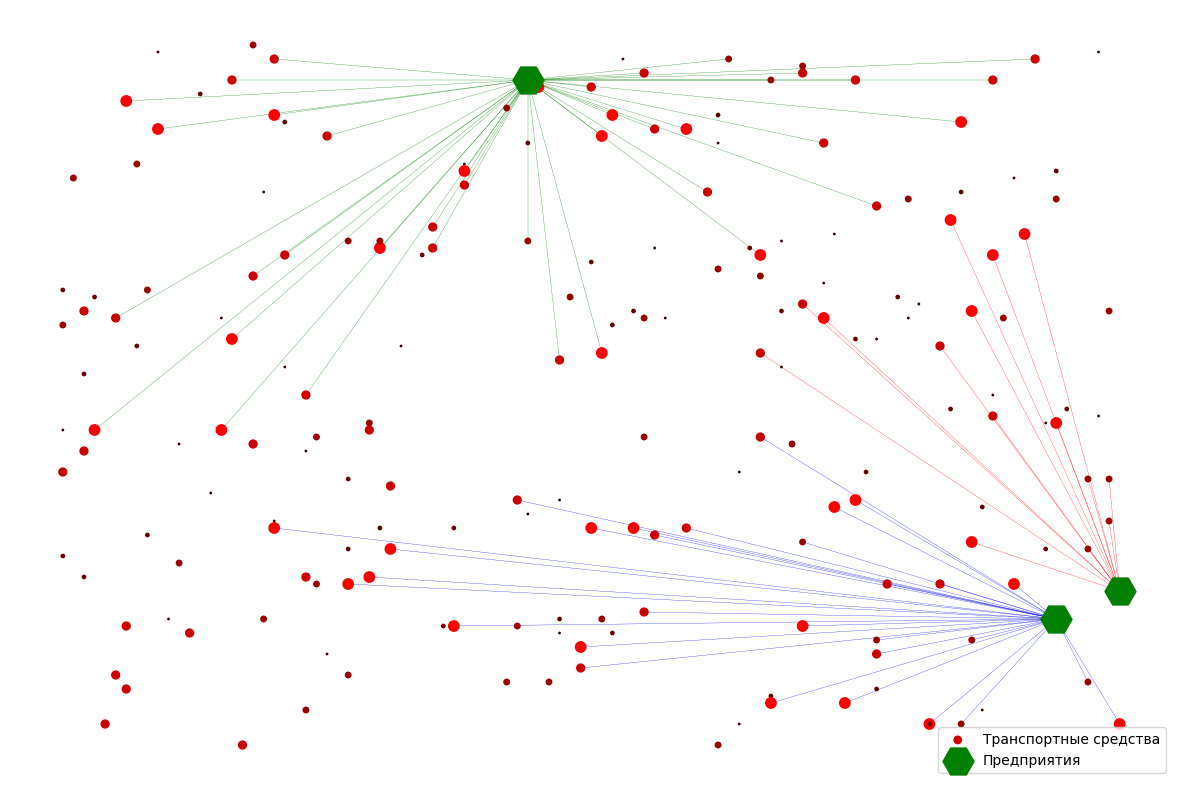

In [58]:
from itertools import cycle

shade_necessity = [int(sev*255/5) for sev in tochki_necessity]
color_necessity = ["#%02x0000" % (sev) for sev in shade_necessity]
size_necessity = [k**2.5 for k in tochki_necessity]
plt.scatter(*zip(*ts_loc), s=size_necessity, c=color_necessity, label="Транспортные средства", zorder=2)
plt.scatter(*zip(*predpriatya_loc), s=500, c="g", marker="H", label="Предприятия", zorder=3)
colors = cycle('bgrcmk')
for i in range(n_predpriatia):
  c = next(colors)
  for (x_,y_) in plot_lines[i]:
    plt.plot(x_,y_,c=c,linewidth=0.2, zorder=1)
plt.legend()
plt.axis('off')
plt.show()